# Biodiversità nel Piemonte Nord Occidentale

In questo notebook ci proponiamo di analizzare la biodiversità nel Piemonte Nord Occidentale (in particolare in alcune aree protette delle province di Novara e Verbania) prendendo in considerazione diverse fonti di dati:

- INaturalist: un'applicazione per la raccolta di osservazioni di piante e animali da citizen scientist
- [GBIF](https://www.gbif.org/): il Global Biodiversity Information Facility, un'organizzazione internazionale che fornisce dati sulla biodiversità a livello globale
- MapOfLife: un database di distribuzione geografica di specie animali
- I dati forniti dalla regione piemonte

Il notebook è un'occasione per raccogliere riferimenti ai dati disponibili sull'argomento e per condurre un'analisi geospaziale con le librerie `pandas`, `geopandas`, `matplotlib` e dei report accattivanti con `plotly`.

## La mappa iniziale della regione di studio

Creiamo una mappa di base della regione di studio su cui aggiungeremo i dati di biodiversità.

Cominciamo caricando i limiti amministrativi delle province del piemonte scaricando il relativo shapefile dal [geo-portale del piemonte](https://www.geoportale.piemonte.it/geonetwork/srv/ita/catalog.search#/search?any=Ambiti%20amministrativi%20-%20Province).

Per il caricamento del file utilizziamo la libreria `geopandas`.

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\EMASINDYS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\EMASINDYS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Limiti amministrativi

<Axes: >

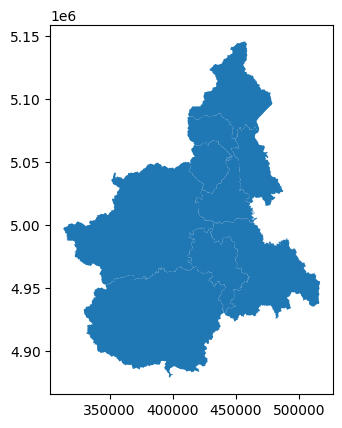

In [3]:
import geopandas as gpd
province_shp_path = '../datasets/AMBITI_AMMINISTRATIVI_PROVINCE/Ambiti_Amministrativi-Province.shp'
province_gdf = gpd.read_file(province_shp_path)
province_gdf.plot()

Visualizziamo i dati per capire come sono strutturati.

In [4]:
province_gdf.head()

,oid,uuid,data_acq,data_agg,data_fine,ente_for,ente_prod,modo_prod,sc_acq,cod_prov,cod_cm,nome,geometry
0,928967,e8ec6fee-57a1-47d7-8e9e-d4153b1265d2,2011-11-11 00:00:00,2011-11-11 00:00:00,None,ISTAT,None,None,None,003,None,Novara,"POLYGON ((472160.52 5058083.535, 472177.489 50..."
1,928972,05778688-d321-4014-ad4d-3f90da8fa5b4,2011-11-11 00:00:00,2011-11-11 00:00:00,None,ISTAT,None,None,None,103,None,Verbania,"POLYGON ((453953.548 5076492.215, 453995.39 50..."
2,928977,3f970a5b-d3ea-4a8b-8548-70a77a93c1e4,2011-11-11 00:00:00,2011-11-11 00:00:00,None,ISTAT,None,None,None,004,None,Cuneo,"POLYGON ((329433.649 4932744.339, 329463.649 4..."
3,928982,2ba34674-d7fd-4e0f-b92b-8b935a89ebe7,2011-11-11 00:00:00,2011-11-11 00:00:00,None,ISTAT,None,None,None,096,None,Biella,"POLYGON ((412667.039 5042924.114, 412692.695 5..."
4,928987,51056927-48d7-4905-81c6-bc90fd7dbecd,2011-11-11 00:00:00,2015-01-01 00:00:00,None,ISTAT,None,None,None,None,201,Torino,"POLYGON ((313280.455 4997166.253, 313282.457 4..."


e filtriamo quindi i confini delle province di Novara e del Verbano-Cusio-Ossola.

<Axes: >

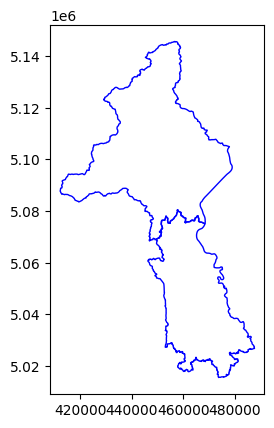

In [5]:
piemonte_no_gdf = province_gdf[province_gdf['nome'].isin(['Novara', 'Verbania'])]
piemonte_no_gdf.plot(edgecolor='blue', facecolor='none')

### Aree protette

I limiti amministrativi ci forniscono un contorno di base a cui vogliamo aggiungere le aree protette. 
Scarichiamo dal portale della regione piemonte lo shapefile di tutte le aree protette.

<Axes: >

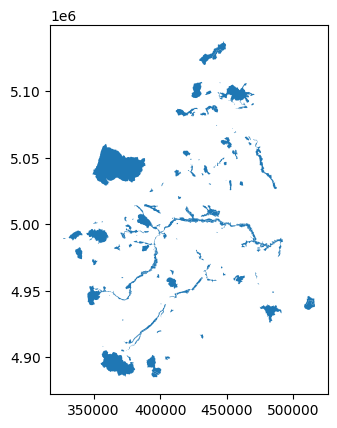

In [6]:
aree_protette_shp = '../datasets/parchi_wgs84/parchi_wgs84.shp'
aree_protette_gdf = gpd.read_file(aree_protette_shp)
aree_protette_gdf.plot()

Vogliamo creare una funzione che ci fornisca una mappa di base a cui potremo aggiungere successivamente i dati di biodiversità come layer sovrapposti.

Per filtrare le aree protette che sono sono situate nelle province di Novara e Verbano-Cusio-Ossola eseguiremo un'intersezione geografica secondo la funzionalità di geopandas `intersection`.

Aggiungeremo inoltre i nomi delle aree protette come etichette sulla mappa, ma solo per quattro aree su cui ci concentreremo in particolare.

In [7]:
# Filtra aree_protette_gdf che sono contenute in piemonte_no_gdf
aree_protette_piemonte_no_gdf = gpd.overlay(aree_protette_gdf, piemonte_no_gdf, how='intersection')

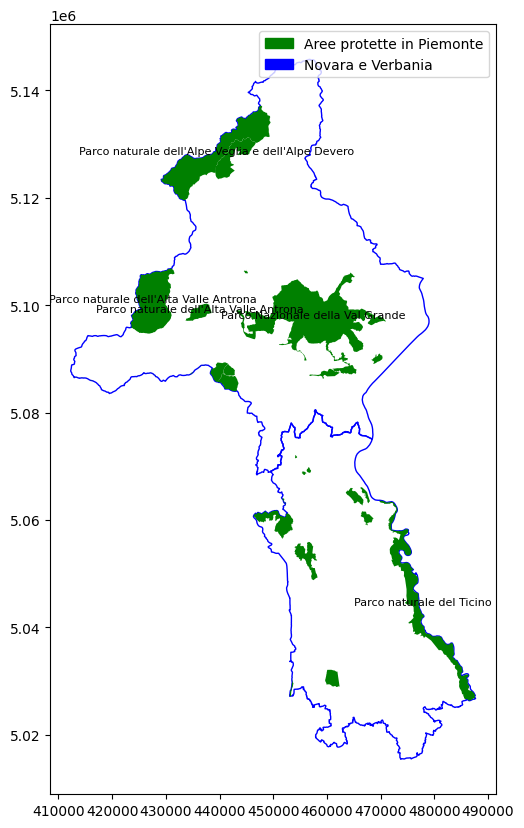

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_base_area():
    # esegui il plot delle aree_protette_piemonte_no_gdf e delle piemonte_no_gdf
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 10)
    piemonte_no_gdf.plot(ax=ax, edgecolor='blue', facecolor='none')
    aree_protette_piemonte_no_gdf.plot(ax=ax, facecolor='green')

    # aggiungi la legenda
    green_patch = mpatches.Patch(color='green', label='Aree protette in Piemonte')
    blue_patch = mpatches.Patch(color='blue', label='Novara e Verbania')
    plt.legend(handles=[green_patch, blue_patch])

    # aggiungi nome_1 come etichetta ma solo per ("Parco naturale dell'Alta Valle Antrona","Parco naturale del Ticino","Parco naturale dell'Alpe Veglia e dell'Alpe Devero", "Parco Nazionale della Val Grande") 
    # per le aree protette e posiziona le etichette in modo che la geometria sia centrata rispetto all'etichetta
    for x, y, label in zip(aree_protette_piemonte_no_gdf.geometry.centroid.x, aree_protette_piemonte_no_gdf.geometry.centroid.y, aree_protette_piemonte_no_gdf['nome_1']):
        if label in ["Parco naturale dell'Alta Valle Antrona","Parco naturale del Ticino","Parco naturale dell'Alpe Veglia e dell'Alpe Devero", "Parco Nazionale della Val Grande"]:
            ax.text(x, y, label, fontsize=8, ha='center')

plot_base_area()

# Le osservazioni di INaturalist

Come prima fonte di dati sulla biodiversità consideriamo le osservazioni di INaturalist.

**iNaturalist** è una comunità di naturalisti online che condividono informazioni sulla biodiversità. Gli utenti registrano osservazioni di piante, animali e funghi, contribuendo alla scienza e ricevendo aiuto per l’identificazione delle specie. L'app è accessibile su vari dispositivi e promuove la conoscenza della natura

Scarichiamo i dati relativi alle osservazioni fatte nella provincia di Verbania e in quella di Novara utilizzando la [pagina di download dati](https://www.inaturalist.org/observations/export) di INaturalist.

Carichiamo i dati e visualizziamo le prime righe.

In [9]:
import pandas as pd

osservazioni_verbania = pd.read_csv('../datasets/observations_verbania-464218.csv')
osservazioni_verbania.head()

,created_at,url,image_url,latitude,longitude,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id,...,taxon_supertribe_name,taxon_tribe_name,taxon_subtribe_name,taxon_genus_name,taxon_genushybrid_name,taxon_species_name,taxon_hybrid_name,taxon_subspecies_name,taxon_variety_name,taxon_form_name
0,2010-05-30 21:57:40 UTC,http://www.inaturalist.org/observations/7346,https://inaturalist-open-data.s3.amazonaws.com...,46.061501,8.700657,Haubentaucher,Podiceps cristatus,Svasso maggiore,Aves,4208.0,...,NaN,NaN,NaN,Podiceps,NaN,Podiceps cristatus,NaN,NaN,NaN,NaN
1,2010-05-30 21:58:56 UTC,http://www.inaturalist.org/observations/7347,https://inaturalist-open-data.s3.amazonaws.com...,46.064568,8.700614,Höckerschwan,Cygnus olor,Cigno reale,Aves,6921.0,...,NaN,NaN,NaN,Cygnus,NaN,Cygnus olor,NaN,NaN,NaN,NaN
2,2011-12-17 20:10:25 UTC,http://www.inaturalist.org/observations/43617,https://static.inaturalist.org/photos/70741/me...,45.939720,8.493719,Tetragnatha nigrita,Tetragnatha nigrita,NaN,Arachnida,121770.0,...,NaN,NaN,NaN,Tetragnatha,NaN,Tetragnatha nigrita,NaN,NaN,NaN,NaN
3,2012-07-21 02:32:20 UTC,http://www.inaturalist.org/observations/103908,https://inaturalist-open-data.s3.amazonaws.com...,46.061613,8.687550,Stag Beetle,Lucanus cervus,Cervo Volante,Insecta,61749.0,...,NaN,Lucanini,NaN,Lucanus,NaN,Lucanus cervus,NaN,NaN,NaN,NaN
4,2013-09-10 06:43:32 UTC,http://www.inaturalist.org/observations/393367,https://inaturalist-open-data.s3.amazonaws.com...,45.840404,8.425468,Machilidae,Machilinae,NaN,Insecta,367978.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gli shapefile, così come altri file geografici, utilizzano un sistema di riferimento spaziale per posizionare i dati sulla superficie terrestre. Per poter sovrapporre i dati di INaturalist sulla mappa di base, dobbiamo assicurarci che entrambi i file utilizzino lo stesso sistema di riferimento.

In [10]:
# visualizza il crs di aree_protette_piemonte_no_gdf e piemonte_no_gdf
print(aree_protette_piemonte_no_gdf.crs)
print(piemonte_no_gdf.crs)

EPSG:32632
EPSG:32632


In [11]:
# crea un GeoDataFrame a partire da osservazioni_verbania usando latitudine e longitudine come coordinate
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(osservazioni_verbania['longitude'], osservazioni_verbania['latitude'])]
osservazioni_verbania_gdf = gpd.GeoDataFrame(osservazioni_verbania, crs='EPSG:4326', geometry=geometry)

# converti il crs di osservazioni_verbania_gdf in `EPSG:32632`
osservazioni_verbania_gdf = osservazioni_verbania_gdf.to_crs('EPSG:32632')

In [12]:
# crea una variabile osservazioni_veglia_devero_gdf che contiene solo le osservazioni di verbania_osservazioni_gdf che sono contenute in "Parco naturale dell'Alpe Veglia e dell'Alpe Devero"
osservazioni_veglia_devero_gdf = gpd.overlay(osservazioni_verbania_gdf, aree_protette_piemonte_no_gdf[aree_protette_piemonte_no_gdf['nome_1'] == "Parco naturale dell'Alpe Veglia e dell'Alpe Devero"], how='intersection')

# crea una variabile osservazioni_valgrande_gdf che contiene solo le osservazioni di verbania_osservazioni_gdf che sono contenute in "Parco Nazionale della Val Grande"
osservazioni_valgrande_gdf = gpd.overlay(osservazioni_verbania_gdf, aree_protette_piemonte_no_gdf[aree_protette_piemonte_no_gdf['nome_1'] == "Parco Nazionale della Val Grande"], how='intersection')

# crea una variabile osservazioni_valle_antrona_gdf che contiene solo le osservazioni di verbania_osservazioni_gdf che sono contenute in "Parco naturale dell'Alta Valle Antrona"
osservazioni_valle_antrona_gdf = gpd.overlay(osservazioni_verbania_gdf, aree_protette_piemonte_no_gdf[aree_protette_piemonte_no_gdf['nome_1'] == "Parco naturale dell'Alta Valle Antrona"], how='intersection')

In [13]:
len(osservazioni_veglia_devero_gdf), len(osservazioni_valgrande_gdf), len(osservazioni_valle_antrona_gdf)

(1565, 2513, 1154)

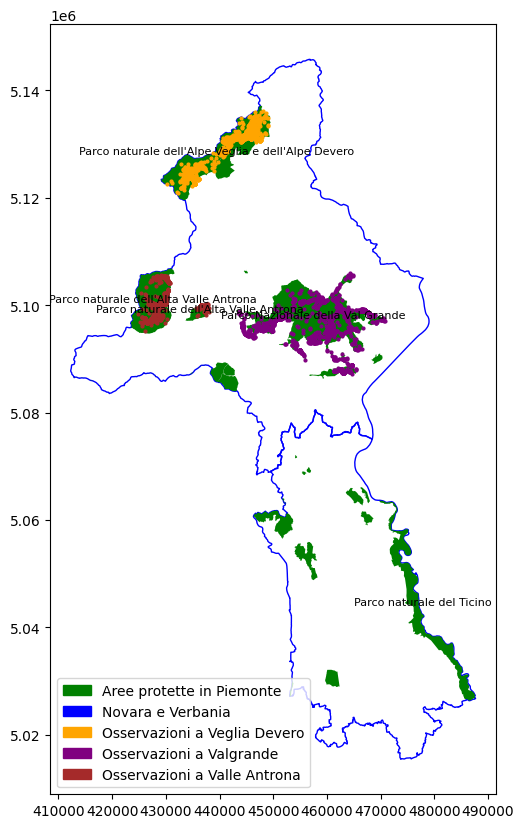

In [14]:
# Richiama la funzione originale plot_base_area()
plot_base_area()

# Aggiungi i layer osservazioni_veglia_devero_gdf, osservazioni_valgrande_gdf e osservazioni_valle_antrona_gdf
osservazioni_veglia_devero_gdf.plot(ax=plt.gca(), color='orange', markersize=4)
osservazioni_valgrande_gdf.plot(ax=plt.gca(), color='purple', markersize=4)
osservazioni_valle_antrona_gdf.plot(ax=plt.gca(), color='brown', markersize=4)

# Aggiorna la legenda per includere i nuovi layer
green_patch = mpatches.Patch(color='green', label='Aree protette in Piemonte')
blue_patch = mpatches.Patch(color='blue', label='Novara e Verbania')
orange_patch = mpatches.Patch(color='orange', label='Osservazioni a Veglia Devero')
purple_patch = mpatches.Patch(color='purple', label='Osservazioni a Valgrande')
brown_patch = mpatches.Patch(color='brown', label='Osservazioni a Valle Antrona')
plt.legend(handles=[green_patch, blue_patch, orange_patch, purple_patch, brown_patch])

plt.show()

In [15]:
# mostra tutte le colonne di osservazioni_veglia_devero_gdf con il relativo numero di valori distinti
for col in osservazioni_veglia_devero_gdf.columns:
    print(f"{col}: {osservazioni_veglia_devero_gdf[col].nunique()}")


created_at: 1437
url: 1565
image_url: 1451
latitude: 1271
longitude: 1283
species_guess: 924
scientific_name: 620
common_name: 521
iconic_taxon_name: 11
taxon_id: 622
taxon_kingdom_name: 4
taxon_phylum_name: 8
taxon_subphylum_name: 7
taxon_superclass_name: 0
taxon_class_name: 20
taxon_subclass_name: 8
taxon_superorder_name: 5
taxon_order_name: 73
taxon_suborder_name: 31
taxon_superfamily_name: 46
taxon_family_name: 167
taxon_subfamily_name: 144
taxon_supertribe_name: 3
taxon_tribe_name: 171
taxon_subtribe_name: 49
taxon_genus_name: 369
taxon_genushybrid_name: 0
taxon_species_name: 489
taxon_hybrid_name: 1
taxon_subspecies_name: 24
taxon_variety_name: 2
taxon_form_name: 0
objectid: 1
inspire_id: 0
cod_euap: 1
cod_legge: 1
dentro: 1
nome_1: 1
nome_breve: 0
id_localit: 1
localita: 1
ente: 1
nome_ente: 1
tipol: 1
d_tipol: 1
tipo_ente: 1
d_tipo_ent: 1
patr: 1
d_patr: 1
mese_istit: 1
anno_istit: 1
mese_ultmo: 0
anno_ultmo: 0
sup_areapr: 1
sup_locali: 0
perim_loca: 0
url1: 0
url2: 1
codice: 1

i dataframe con le osservazioni contengono per ciascuna osservazione la gerarchia tassonomica della specie osservata. Vogliamo visualizzare la distribuzione delle osservazioni per le diverse categorie tassonomiche nelle diverse aree protette filtrate. Iniziamo dal livello più alto, ovvero il regno.

In [16]:
# mostra il numero di osservazioni diverse per taxon_kingdom_name in osservazioni_veglia_devero_gdf
print(f"osservazioni_veglia_devero_gdf: {osservazioni_veglia_devero_gdf['taxon_kingdom_name'].value_counts()}")

# mostra il numero di osservazioni diverse per taxon_class_name in osservazioni_valgrande_gdf
print(f"osservazioni_valgrande_gdf: {osservazioni_valgrande_gdf['taxon_kingdom_name'].value_counts()}")

# mostra il numero di osservazioni diverse per taxon_order_name in osservazioni_valle_antrona_gdf
print(f"osservazioni_valle_antrona_gdf: {osservazioni_valle_antrona_gdf['taxon_kingdom_name'].value_counts()}")

osservazioni_veglia_devero_gdf: taxon_kingdom_name
Animalia    1023
Plantae      505
Fungi         34
Protozoa       1
Name: count, dtype: int64
osservazioni_valgrande_gdf: taxon_kingdom_name
Animalia    1645
Plantae      803
Fungi         58
Name: count, dtype: int64
osservazioni_valle_antrona_gdf: taxon_kingdom_name
Animalia    579
Plantae     549
Fungi        25
Protozoa      1
Name: count, dtype: int64


### Visualizzazione con plotly

Per una visualizzazione più interattiva e accattivante, utilizziamo la libreria `plotly`, e in particolare creiamo delle treemap per visualizzare la distribuzione delle osservazioni per le diverse categorie tassonomiche.

In [17]:
%pip install plotly_express

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly_express in c:\users\emasindys\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.4.1)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\EMASINDYS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Per poter creare la treemap è necessario filtrare i dati in cui il taxon_species_name, che costituisce la foglia dell'albero, è diverso da `null`.

In [18]:
# filtrare le righe con valori mancanti per la colonna taxon_species_name
osservazioni_veglia_devero_gdf_subset = osservazioni_veglia_devero_gdf.dropna(subset=['taxon_species_name'])
osservazioni_valgrande_gdf_subset = osservazioni_valgrande_gdf.dropna(subset=['taxon_species_name'])
osservazioni_valle_antrona_gdf_subset = osservazioni_valle_antrona_gdf.dropna(subset=['taxon_species_name'])

Verifichiamo quanti dati sono stati filtrati e creiamo le treemap.

In [19]:
# mostra il numero di osservazioni diverse per taxon_kingdom_name in osservazioni_veglia_devero_gdf
print(f"osservazioni_veglia_devero_gdf_subset: {osservazioni_veglia_devero_gdf_subset['taxon_kingdom_name'].value_counts()}")

# mostra il numero di osservazioni diverse per taxon_class_name in osservazioni_valgrande_gdf
print(f"osservazioni_valgrande_gdf_subset: {osservazioni_valgrande_gdf_subset['taxon_kingdom_name'].value_counts()}")

# mostra il numero di osservazioni diverse per taxon_order_name in osservazioni_valle_antrona_gdf
print(f"osservazioni_valle_antrona_gdf_subset: {osservazioni_valle_antrona_gdf_subset['taxon_kingdom_name'].value_counts()}")

osservazioni_veglia_devero_gdf_subset: taxon_kingdom_name
Animalia    902
Plantae     470
Fungi        26
Protozoa      1
Name: count, dtype: int64
osservazioni_valgrande_gdf_subset: taxon_kingdom_name
Animalia    1428
Plantae      611
Fungi         42
Name: count, dtype: int64
osservazioni_valle_antrona_gdf_subset: taxon_kingdom_name
Animalia    506
Plantae     456
Fungi        16
Name: count, dtype: int64


#### TreeMap delle osservazioni nel Parco Naturale Veglia Devero

In [20]:
import plotly.express as px

# create a treemap plot using plotly express with the data in osservazioni_veglia_devero_gdf_subset
fig = px.treemap(osservazioni_veglia_devero_gdf_subset, path=['taxon_kingdom_name','taxon_phylum_name','taxon_class_name','taxon_order_name','taxon_family_name','taxon_genus_name','taxon_species_name'])
fig.show()

#### TreeMap delle osservazioni nel Parco Nazionale Val Grande

In [21]:
# create a treemap plot using plotly express with the data in osservazioni_valgrande_gdf_subset
fig = px.treemap(osservazioni_valgrande_gdf_subset, path=['taxon_kingdom_name','taxon_phylum_name','taxon_class_name','taxon_order_name','taxon_family_name','taxon_genus_name','taxon_species_name'])
fig.show()

#### TreeMap delle osservazioni nel Parco Naturale dell'Alta Valle Antrona

In [22]:
# create a treemap plot using plotly express with the data in osservazioni_valle_antrona_gdf_subset
fig = px.treemap(osservazioni_valle_antrona_gdf_subset, path=['taxon_kingdom_name','taxon_phylum_name','taxon_class_name','taxon_order_name','taxon_family_name','taxon_genus_name','taxon_species_name'])
fig.show()

In [69]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

# crea un widget per filtrare i dati in osservazioni_veglia_devero_gdf_subset in base a taxon_kingdom_name
import ipywidgets as widgets
from ipywidgets import interact

@interact(taxon_kingdom_name=osservazioni_veglia_devero_gdf_subset['taxon_kingdom_name'].unique())
def filter_data(taxon_kingdom_name='Animalia'):
    filtered_data = osservazioni_veglia_devero_gdf_subset[osservazioni_veglia_devero_gdf_subset['taxon_kingdom_name'] == taxon_kingdom_name]
    # filtra ulteriormente i dati che hanno la colonna image_url non vuota
    filtered_data = filtered_data.dropna(subset=['image_url'])

    plt.figure(figsize=(24, 12))
    # crea una tabella di 10 immagini casuali in base ai dati filtrati e alla colonna image_url
    if len(filtered_data) > 0:
        for i, url in enumerate(filtered_data.sample(10)['image_url']):
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))

            plt.subplot(2, 5, i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()
    

interactive(children=(Dropdown(description='taxon_kingdom_name', options=('Animalia', 'Plantae', 'Fungi', 'Pro…

<Figure size 2400x1200 with 0 Axes>